In [52]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
rating = pd.read_csv("rating.csv")

In [54]:
rating

,Unnamed: 0,user_id,anime_id,rating
0,2443027,23306,3503,7
1,4751250,45366,1190,-1
2,7694962,72305,5150,8
3,7066179,65975,6045,10
4,7198178,67151,3702,9
...,...,...,...,...
3906863,1916240,18616,9919,8
3906864,2299691,22150,1709,7
3906865,6825920,63249,9922,7
3906866,3429959,31619,11981,10


In [55]:
anime = pd.read_csv("anime.csv")

In [56]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [57]:
rating.head()

,Unnamed: 0,user_id,anime_id,rating
0,2443027,23306,3503,7
1,4751250,45366,1190,-1
2,7694962,72305,5150,8
3,7066179,65975,6045,10
4,7198178,67151,3702,9


In [58]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [59]:
# def filtering(row):
#     if "Drama" in row["genre"]

In [60]:
items = np.array(anime.genre)

In [61]:
vals = [("Drama" in str(item)) for item in items]

In [62]:
anime.loc[vals]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
...,...,...,...,...,...,...,...
12017,2218,Fujimi 2-choume Koukyougakudan,"Drama, Music, Psychological, Romance, Slice of...",OVA,1,5.72,4981
12071,3396,Gloria: Kindan no Ketsuzoku,"Drama, Hentai, Mystery, Romance",OVA,3,5.61,654
12143,4697,Chimera: Target I Datenshi Kourin,"Drama, Hentai",OVA,1,5.46,841
12203,730,Houkago no Shokuinshitsu,"Drama, Romance, Yaoi",OVA,2,5.23,4550


In [63]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [64]:
x = anime.loc[vals]

In [65]:
x_mod = x[['episodes','rating', 'members']]

In [66]:
x_mod.describe()

,rating,members
count,1977.000000,2016.000000
mean,6.977218,28900.097718
std,0.881088,71701.646529
min,3.330000,20.000000
25%,6.420000,443.750000
50%,7.020000,4079.000000
75%,7.560000,22722.500000
max,9.370000,896229.000000


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating', ylabel='members'>

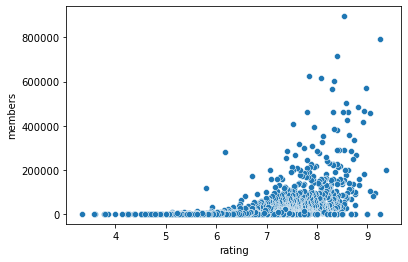

In [67]:
sns.scatterplot(x_mod.rating,x_mod.members)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating', ylabel='type'>

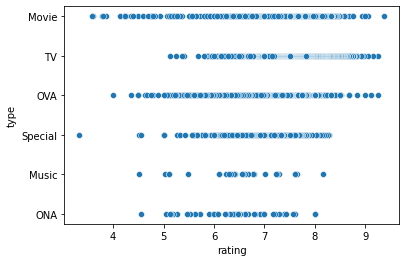

In [68]:
sns.scatterplot(x.rating,x.type)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating', ylabel='episodes'>

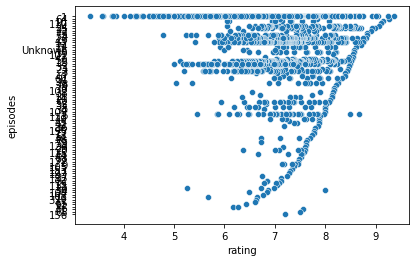

In [75]:
sns.scatterplot(x.rating,x.episodes)